In [1]:
import cAlg as cAlg
print(dir(cAlg))
cAlg.mainfort()

['__doc__', '__f2py_numpy_version__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '__version__', '_cAlg_error', 'dealloc_chunk', 'dealloc_struct', 'get_rain_type', 'init_random_seed', 'init_random_seed2', 'mainfort', 'pass_file_names', 'radarretsub2', 'set_gmi_data', 'testr']
 Random Seeds :     47945880           1
           1


           8
imu:     1  mu:    -2.0000  mu_tab:    -2.0000
   10.6499996    
   18.7000008    
   23.7999992    
   35.5000000    
   89.0000000    
   165.500000    
   183.300003    
imu:     2  mu:    -1.0000  mu_tab:    -1.0000
   10.6499996    
   18.7000008    
   23.7999992    
   35.5000000    
   89.0000000    
   165.500000    
   183.300003    
imu:     3  mu:     0.0000  mu_tab:     0.0000
   10.6499996    
   18.7000008    
   23.7999992    
   35.5000000    
   89.0000000    
   165.500000    
   183.300003    
imu:     4  mu:     1.0000  mu_tab:     1.0000
   10.6499996    
   18.7000008    
   23.7999992    
   35.5000000

In [2]:
f1C11='data/1C-CS-92W47N60W21N.GPM.GMI.XCAL2016-C.20241009-S035045-E035921.060269.V07B.HDF5'
fDPR='data/2A-CS-92W47N60W21N.GPM.DPR.V9-20240130.20241009-S035207-E035919.060269.V07C.HDF5'
f2AKu='data/2A-CS-92W47N60W21N.GPM.Ku.V9-20240130.20241009-S035207-E035919.060269.V07C.HDF5'
f2ENv='data/2A-ENV.GPM.Ku.V9-20240130.20241009-S025626-E042939.060269.V07C.HDF5'
from read_GMI import read_gmi
from read2AKuDPR import read2AKuDPR

import importlib
#importlib.reload(cAlg)
gmi_data=read_gmi(f1C11)
lon_s1, lat_s1, tc_S1, lon_s2, lat_s2, tc_S2, sc_lat, sc_lon, inc_angle_s1, inc_angle_s2, sun_glint_angle_s1,yy,mm,dd,jday=gmi_data
radar_data=read2AKuDPR(f2AKu,fDPR,0,300)
zKuObs,binRealSurface,localZenithAngle,elevation,binClutterFree,binZeroDegree,piaHB,srtrelPIAku,NSRelibFlag,raintype,snowIceCover,seaIceConcentration,snrRatioku,srtPIAku,srtsigmaPIAku,sigmaZeroKu,freeZH,envTemp,missing_flag,dataquality_flag,modestatus_flag,iLandOcean,flagPrecip,sfcRain,zKaObs,dsrtPIAKa,dsrtPIAKu,dsrtrelPIA,MSRelibFlag,dsrtsigmaPIAku,xlon,xlat,yy_radar,jday_radar,mp_nodes=radar_data
tpwC=cAlg.set_gmi_data(tc_S1.T,lat_s1.T,lon_s1.T,tc_S2.T,lat_s2.T,lon_s2.T,sc_lon,sc_lat,inc_angle_s1[:,:,0].T,inc_angle_s2[:,:,0].T,mm[0],jday[0])
sysdn=-0.25
nMemb=10
n_mu=5
n_max_freq=8
for i in range(1):
    cAlg.radarretsub2(sysdn,nMemb,n_mu,n_max_freq)
#print(inc_angle_s1.shape)
#print(inc_angle_s2.shape)
#print(sun_glint_angle_s1.shape)

 got before param_set
          10           5           8
 ngates          88          10           8 ncld=          50
          10           5           8
 ngates          88          10           8 ncld=          50
          10           5           8
 ngates          88          10           8 ncld=          50
          10           5           8
 ngates          88          10           8 ncld=          50
          10           5           8
 ngates          88          10           8 ncld=          50
          10           5           8
 ngates          88          10           8 ncld=          50
          10           5           8
 ngates          88          10           8 ncld=          50
          10           5           8
 ngates          88          10           8 ncld=          50
          10           5           8
 ngates          88          10           8 ncld=          50
          10           5           8
 ngates          88          10           8 ncld= 

/var/folders/x_/d2_jzyq50052xh1_tk02bnmc0000gq/T/ipykernel_30395/3016030523.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lon_s1,lat_s1,tpwC.T,vmin=0,cmap='jet')


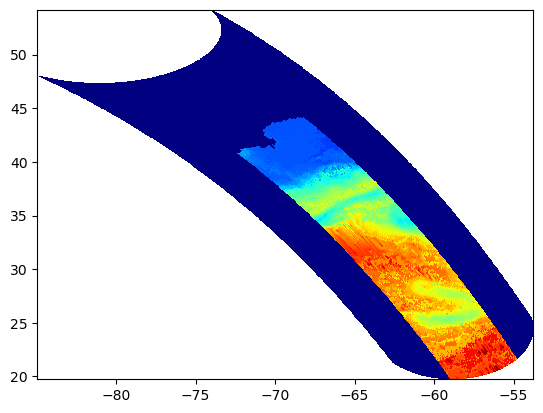

In [5]:
import matplotlib.pyplot as plt
plt.pcolormesh(lon_s1,lat_s1,tpwC.T,vmin=0,cmap='jet')    